In [9]:
import pickle
import pandas as pd
import geopandas as gpd
pd.options.display.max_columns = None
pd.options.mode.chained_assignment = None  # default='warn'
import contextily as cx

#display
from IPython.display import display
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns
import folium
plt.rcParams["figure.figsize"] = (20,15)
from IPython.display import clear_output
import contextily as cx

import sys
sys.path.append("../")
import src.supportClean as sc

import sys
sys.path.append("../")
import src.bibliotheque as bb

# data input

In [2]:
with open('../data/ayto_madrid/ayto_madrid_hotels.pickle', 'rb') as df_hoteles:
    df_hoteles = pickle.load(df_hoteles)
print(df_hoteles.shape)
df_hoteles.head(1)

(611, 24)


,@fechaActualizacion,@id,language,name,email,phone,fax,title,body,web,address,zipcode,locality,country,latitude,longitude,subAdministrativeArea,fechas,cod1_num,cod1_txt,cod2_num,cod2_txt,cod3_num,cod3_txt
0,2023-04-12,101557,es,JW Marriott Madrid,None,+34 914 18 97 70,None,JW Marriott Madrid,<p><strong>Ubicado junto a la Plaza de Canalej...,https://www.esmadrid.com/alojamientos/jw-marri...,"Sevilla, 2",28014,Madrid,Spain,40.416801800000,-3.700126000000,Madrid,None,3,Alojamientos,7022,Hoteles,7027,5 estrellas


In [3]:
df_hoteles['cod2_txt_en'] = df_hoteles['cod2_txt'].replace(bb.accommodation_type)
df_hoteles['cod1_txt_en'] = df_hoteles['cod1_txt'].replace(bb.accommodation)
df_hoteles['cod3_txt_en'] = df_hoteles['cod3_txt'].replace(bb.hotel_apartments_ratings)
df_hoteles[['cod1_txt_en', 'cod2_txt_en', 'cod3_txt_en']].value_counts()

cod1_txt_en    cod2_txt_en  cod3_txt_en      
Accommodation  Hotels       4.0                  163
               Hostel       2.0                  107
               Hotels       3.0                   70
               Hostel       1.0                   47
                            3.0                   39
               Hotels       5.0                   25
                            2.0                   20
               Apartments   3.0                   17
               Hotels       6.0                   13
               Hostels      1.0                   10
               Apartments   1.0                    5
                            2.0                    4
                            4.0                    4
               Hotels       1.0                    3
               Hostels      2.0                    2
               Camping      Segunda categoría      1
dtype: int64

In [4]:
print(df_hoteles.shape)
df_hoteles.head(1)

(611, 27)


,@fechaActualizacion,@id,language,name,email,phone,fax,title,body,web,address,zipcode,locality,country,latitude,longitude,subAdministrativeArea,fechas,cod1_num,cod1_txt,cod2_num,cod2_txt,cod3_num,cod3_txt,cod2_txt_en,cod1_txt_en,cod3_txt_en
0,2023-04-12,101557,es,JW Marriott Madrid,None,+34 914 18 97 70,None,JW Marriott Madrid,<p><strong>Ubicado junto a la Plaza de Canalej...,https://www.esmadrid.com/alojamientos/jw-marri...,"Sevilla, 2",28014,Madrid,Spain,40.416801800000,-3.700126000000,Madrid,None,3,Alojamientos,7022,Hoteles,7027,5 estrellas,Hotels,Accommodation,5.0


In [10]:
map1 = folium.Map(
    location=[40.41694, -3.70361],
    tiles='cartodbpositron',
    zoom_start=12,
)
df_hoteles[df_hoteles['latitude'].isnull() == False].apply(lambda row:folium.CircleMarker(location=[row["latitude"], row["longitude"]]).add_to(map1), axis=1)
map1

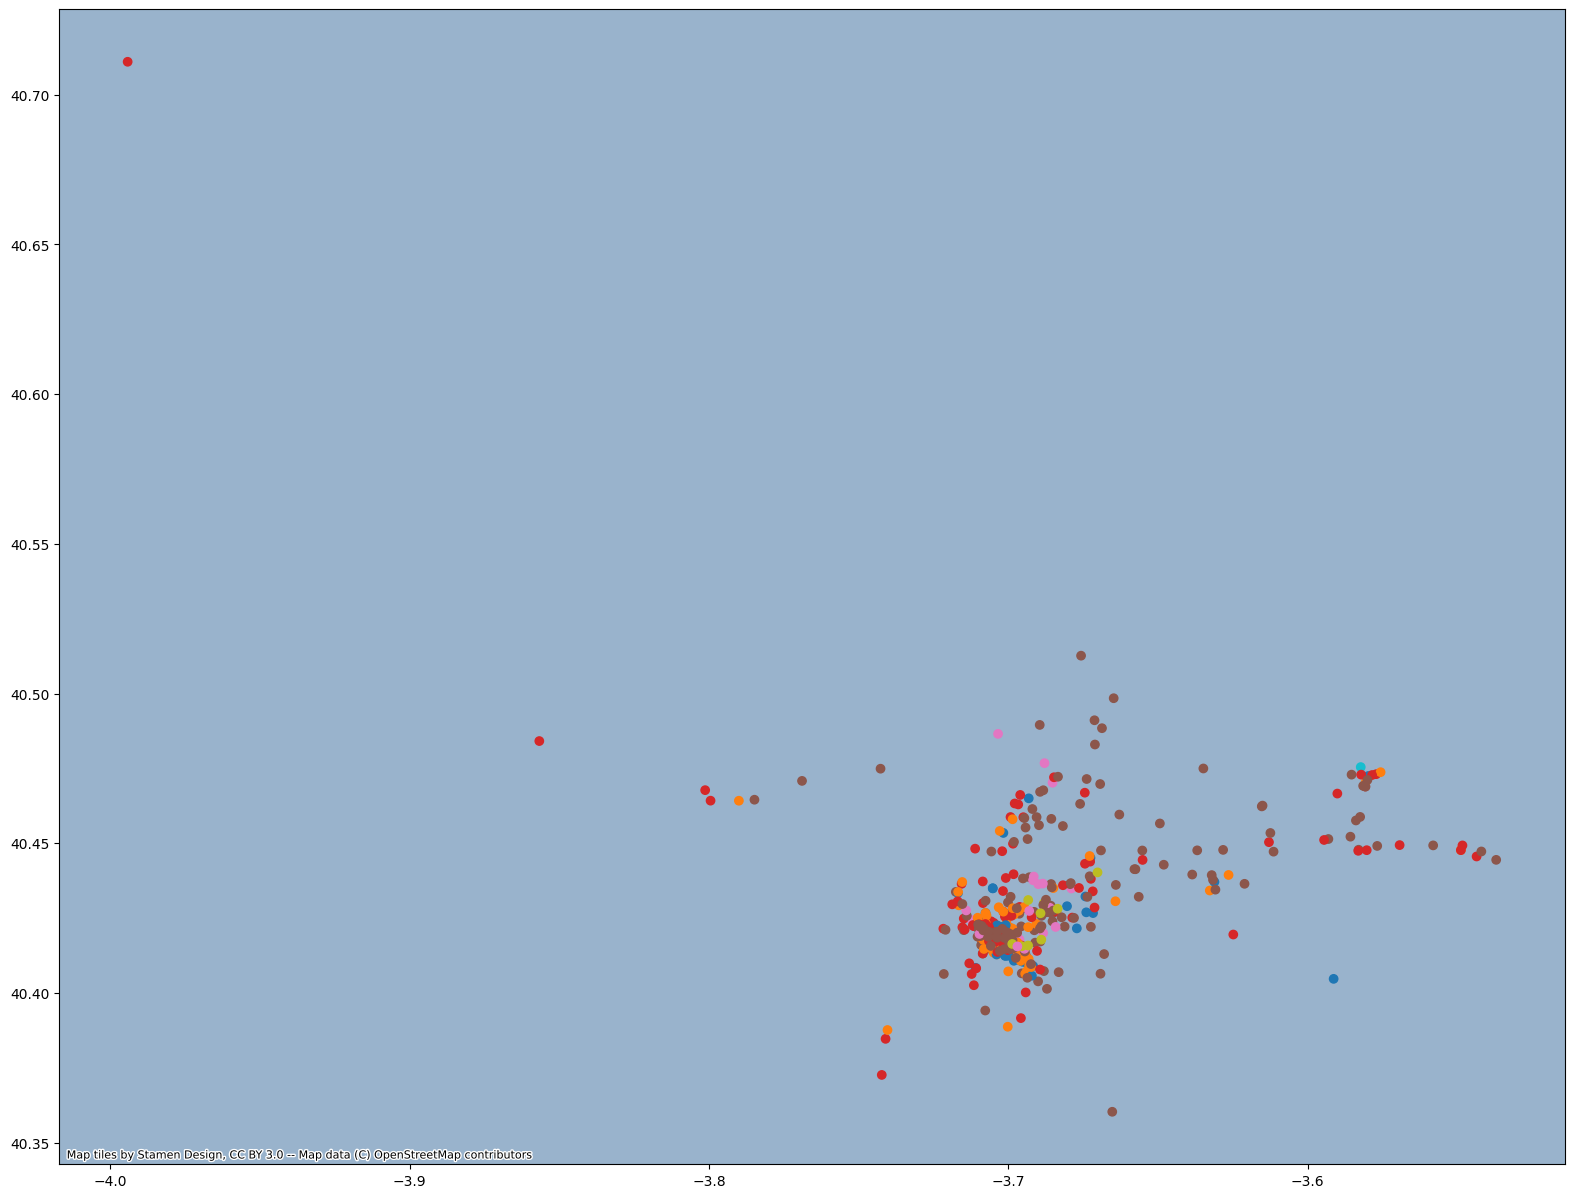

In [8]:
gdf_hoteles = gpd.GeoDataFrame(df_hoteles, geometry=gpd.points_from_xy(df_hoteles.longitude, df_hoteles.latitude)).set_crs('epsg:4326')
ax = gdf_hoteles.to_crs(epsg=25830).plot(column='cod3_txt_en', cmap=None)
cx.add_basemap(ax)